### Import important packages like pandas and numpy

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Store your directory and file names in a variable for code reusability

In [2]:
location='C://Backup//DataPartition//RIT Course Work//BANA//Assignment 1//'
file1='NCHS_-_Leading_Causes_of_Death__United_States.csv'
file2='nst-est2018-01.xlsx'

### Reading the file into data frames

In [4]:
df1=pd.read_csv(location+file1)
df2=pd.read_excel(location+file2,header=None)

### Exploring and viewing the data

In [5]:
df1.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8
4,2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Arizona,325,4.1


In [6]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,table with row headers in column A and column ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Table 1. Annual Estimates of the Resident Popu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Geographic Area,2010-04-01 00:00:00,NaN,Population Estimate (as of July 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
4,United States,308745538,308758105,309326085,311580009.0,313874218.0,316057727.0,318386421.0,320742673.0,323071342.0,325147121.0,327167434.0


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 6 columns):
Year                       10296 non-null int64
113 Cause Name             10296 non-null object
Cause Name                 10296 non-null object
State                      10296 non-null object
Deaths                     10296 non-null int64
Age-adjusted Death Rate    10296 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 482.8+ KB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 12 columns):
0     65 non-null object
1     59 non-null object
2     58 non-null object
3     59 non-null object
4     58 non-null float64
5     58 non-null float64
6     58 non-null float64
7     58 non-null float64
8     58 non-null float64
9     58 non-null float64
10    58 non-null float64
11    58 non-null float64
dtypes: float64(8), object(4)
memory usage: 6.4+ KB


# Question 1 Sub Question 1
## Are Americans facing increasing, decreasing, or steady likelihood of death?

In [220]:
df1.head()

# Group by the year and sum all the deaths for each year
df1_likelihood=df1.groupby('Year')['Deaths'].agg('sum')
df1_likelihood

Year
1999    8594450
2000    8611090
2001    8631566
2002    8724520
2003    8720806
2004    8523496
2005    8675996
2006    8561880
2007    8540026
2008    8689930
2009    8551328
2010    8641568
2011    8769558
2012    8839734
2013    9014608
2014    9129652
2015    9451294
2016    9556734
Name: Deaths, dtype: int64

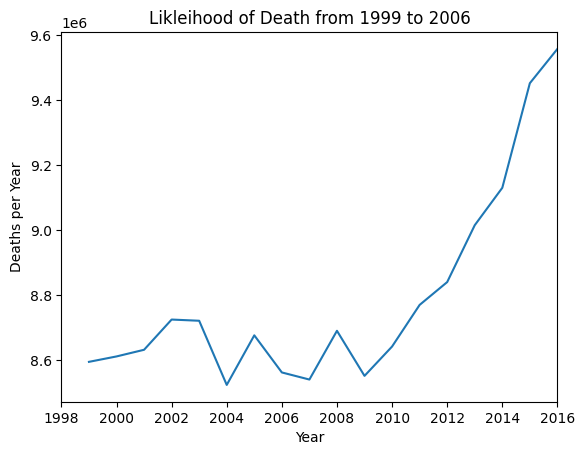

In [225]:
# Plot the data
plt.figure()
plt.ylabel("Deaths per Year")
plt.xlim(1998,2016)
plt.xlabel("Year")
plt.title("Likleihood of Death from 1999 to 2006")

plt.plot(df1_likelihood.index,df1_likelihood.values)

plt.show()



# Question 1 Sub Question 2


## What are top 4 leading causes of death?

In [261]:
# ### Get the Years column sorted
df1_sorted_by_year = df1.sort_values(by=['Year'])

df1_sorted_by_year # 10296 rows

# ### Get all the unique causes: 11 Unique Causes (936 each)
df1_sorted_by_year.iloc[0:, 1].value_counts()
"""
All Causes                                                               936
Alzheimer's disease (G30)                                                936
Chronic lower respiratory diseases (J40-J47)                             936
Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)    936
Malignant neoplasms (C00-C97)                                            936
Accidents (unintentional injuries) (V01-X59,Y85-Y86)                     936
Diabetes mellitus (E10-E14)                                              936
Cerebrovascular diseases (I60-I69)                                       936
Influenza and pneumonia (J09-J18)                                        936
Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)                     936
Diseases of heart (I00-I09,I11,I13,I20-I51)                              936
Name: 113 Cause Name, dtype: int64
"""

## Display only these three columns 
df1_causes_and_death = df1_sorted_by_year[['113 Cause Name', 'Cause Name', 'Deaths']]
# df1_causes_and_death

#####################################################################
### The Below was used to help understand one type of cause of death

## Find the unique count of the causes
# df1_causes_and_death.iloc[0:, 1].value_counts()


## Get the deaths for a specific cause name
# clrd_deaths = df1_causes_and_death[df1_causes_and_death.iloc[0:,1].isin(['CLRD'])]
# clrd_deaths

## Get the cumulative count: 4869452 Deaths by CLRD
# clrd_deaths.iloc[0:,2].agg('sum')
#####################################################################

## Use pivot table to help aggregate all the causes and summing their deaths
total_deaths_per_causes = pd.pivot_table(df1_causes_and_death,
                                         values='Deaths',
                                         index=['Cause Name'],
                                         #columns=['113 Cause Name'],
                                         aggfunc=np.sum)

#total_deaths_per_causes

## Sort the pivot table in descending order
deaths_descending = total_deaths_per_causes.sort_values(by=['Deaths'], ascending=False)
# deaths_descending

## Display the top 4
top_4_deaths = deaths_descending.iloc[1:5]
top_4_deaths.values


## Alternative Method to getting the 4 leading causes of death
cause_of_death = df1_causes_and_death.groupby('Cause Name')
sum_cause_of_death = cause_of_death['Deaths'].agg('sum')
top_4_deaths = sum_cause_of_death.sort_values(ascending=False).iloc[1:5]
top_4_deaths

Cause Name
Heart disease    23150366
Cancer           20489072
Stroke            5160280
CLRD              4869452
Name: Deaths, dtype: int64

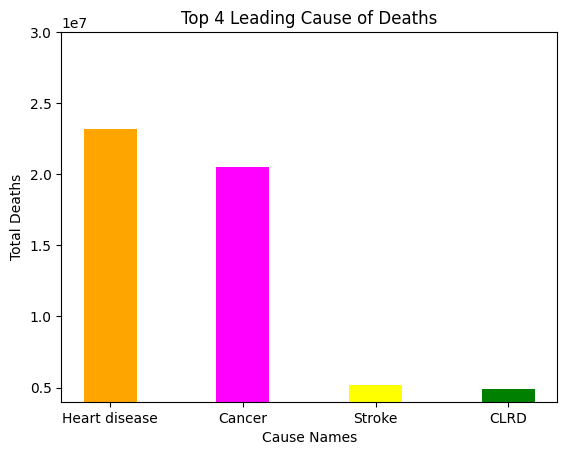

In [275]:
# Plot the data
plt.figure()
plt.ylabel("Total Deaths")
plt.xlabel("Cause Names")
plt.ylim(4000000,30000000)
plt.title("Top 4 Leading Cause of Deaths")

plt.bar(top_4_deaths.index, top_4_deaths.values, width=0.4, color=['orange', 'magenta', 'yellow', 'green'])
plt.show()


# Question 1 Sub Question 3


## Do individual states show the same four leading causes of death??

In [313]:
df1.head()


##Picking up data only for deaths,states and cause name

df1_deaths_states_all=df1.loc[:,['Deaths','State','Cause Name']]

###Sort the data with death 

df1_deaths_states_all=df1_deaths_states_all.sort_values(by=['State','Cause Name'],ascending=False)

df1_deaths_states_all=df1_deaths_states_all[df1_deaths_states_all['State']!='United States']
df1_deaths_states_all=df1_deaths_states_all[df1_deaths_states_all['Cause Name']!='All causes']

df1_deaths_states_all=df1_deaths_states_all.groupby(['State','Cause Name'],as_index=False)['Deaths'].agg(sum)

pd.set_option('display.max_rows', 530)

df1_deaths_states_all

df1_deaths_states_all = df1_deaths_states_all.sort_values(by=['State','Deaths'],ascending=False)


count = 4
curr_count = 0
state_dic = {}
for index, row in df1_deaths_states_all.iterrows():
    #print(row['State'], row['Cause Name'])
    if row['State'] in state_dic:
        if curr_count < count:
            state_dic[row['State']].append(row['Cause Name'])
            curr_count += 1
        else:
            continue
    else:
        state_dic[row['State']] = []
        curr_count = 0
        
state_dic       

state_df = pd.DataFrame(state_dic)

state_df[state_df.isin(['Heart disease', 'Cancer', 'Stroke', 'CLRD'])]

,Wyoming,Wisconsin,West Virginia,Washington,Virginia,Vermont,Utah,Texas,Tennessee,South Dakota,...,Florida,District of Columbia,Delaware,Connecticut,Colorado,California,Arkansas,Arizona,Alaska,Alabama
0,Cancer,Cancer,Cancer,Heart disease,Cancer,Heart disease,Cancer,Cancer,Cancer,Cancer,...,Cancer,Cancer,Cancer,Cancer,Heart disease,Cancer,Cancer,Cancer,Heart disease,Cancer
1,CLRD,Stroke,CLRD,Stroke,Stroke,CLRD,NaN,Stroke,Stroke,Stroke,...,CLRD,Stroke,CLRD,Stroke,NaN,Stroke,Stroke,NaN,NaN,Stroke
2,NaN,NaN,NaN,CLRD,CLRD,NaN,Stroke,NaN,CLRD,CLRD,...,Stroke,NaN,Stroke,CLRD,CLRD,CLRD,CLRD,CLRD,Stroke,CLRD
3,Stroke,CLRD,Stroke,NaN,NaN,Stroke,CLRD,CLRD,NaN,NaN,...,NaN,NaN,NaN,NaN,Stroke,NaN,NaN,Stroke,CLRD,NaN


# Question 1 Sub Question 4


## Are there year-by-year changes in the four leading causes of death nationwide?

In [317]:
df1.head()
df1_yearly_leading_causes=df1.loc[:,['Year','Cause Name','Deaths']]
df1_yearly_leading_causes=df1.groupby(['Cause Name','Year'],as_index=False)['Deaths'].agg(sum)
df1_yearly_leading_causes=pd.DataFrame(df1_yearly_leading_causes)

df1_yearly_leading_causes=df1_yearly_leading_causes[df1_yearly_leading_causes['Cause Name'].isin(top_4_deaths.index)]
df1_yearly_leading_causes

,Cause Name,Year,Deaths
36,CLRD,1999,248362
37,CLRD,2000,244018
38,CLRD,2001,246026
39,CLRD,2002,249632
40,CLRD,2003,252764
41,CLRD,2004,243974
42,CLRD,2005,261866
43,CLRD,2006,249166
44,CLRD,2007,255848
45,CLRD,2008,282180


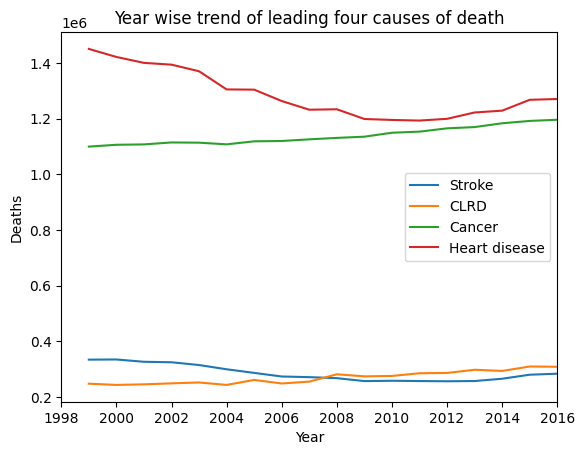

In [318]:
plt.figure()
plt.ylabel("Deaths")
plt.xlim(1998,2016)

plt.xlabel("Year")
plt.title("Year wise trend of leading four causes of death")

plt.plot(df1_yearly_leading_causes[df1_yearly_leading_causes['Cause Name']=='Stroke']['Year'],df1_yearly_leading_causes[df1_yearly_leading_causes['Cause Name']=='Stroke']['Deaths'],label='Stroke')
plt.plot(df1_yearly_leading_causes[df1_yearly_leading_causes['Cause Name']=='CLRD']['Year'],df1_yearly_leading_causes[df1_yearly_leading_causes['Cause Name']=='CLRD']['Deaths'],label='CLRD')
plt.plot(df1_yearly_leading_causes[df1_yearly_leading_causes['Cause Name']=='Cancer']['Year'],df1_yearly_leading_causes[df1_yearly_leading_causes['Cause Name']=='Cancer']['Deaths'],label='Cancer')
plt.plot(df1_yearly_leading_causes[df1_yearly_leading_causes['Cause Name']=='Heart disease']['Year'],df1_yearly_leading_causes[df1_yearly_leading_causes['Cause Name']=='Heart disease']['Deaths'],label='Heart disease')
plt.legend(loc='center right')
plt.show()

### Drop first two cells for data cleaning purposes

In [373]:
## Pull the column title "Geographic Area"
label = df2.iloc[2,0]

## Pull the remainder row containing the header
headers = df2.iloc[3:4]

## Pull the values within the rows
headers.values

## Create new column header array
newColumnHeaders = []

## Add the first value to it
newColumnHeaders.append(label)

## Add the remainder values to it
for x in headers.values[0]:
    if isinstance(x, float):
        if np.isnan(x):
            continue
        newColumnHeaders.append(int(x))
        continue
    newColumnHeaders.append(x)

newColumnHeaders

## Make the clean data frame with the values from United States to Puerto Rico
cleanDF = pd.DataFrame(df2.iloc[4:-5])
## Assign the new column headers
cleanDF.columns = newColumnHeaders
## Get rid of row number 60 as it was just an empty row
cleanDF = cleanDF.dropna()

cleanDF=cleanDF.drop(['Census','Estimates Base'],axis=1)
cleanDF.set_index('Geographic Area')
cleanDF.transpose()
cleanDF

state_col = cleanDF.iloc[0:,0]
#state_col['Geographic Area'].apply(lambda x: x[0].upper() + x[1:])

df_state = pd.DataFrame(state_col)
cleanDF = cleanDF.iloc[0:, 1:].astype(int)

df_state.merge(cleanDF, left_index=True, right_index=True)





,Geographic Area,2010,2011,2012,2013,2014,2015,2016,2017,2018
4,United States,309326085,311580009,313874218,316057727,318386421,320742673,323071342,325147121,327167434
5,Northeast,55380645,55600532,55776729,55907823,56015864,56047587,56058789,56072676,56111079
6,Midwest,66974749,67152631,67336937,67564135,67752238,67869139,67996917,68156035,68308744
7,South,114867066,116039399,117271075,118393244,119657737,121037542,122401186,123598424,124753948
8,West,72103625,72787447,73489477,74192525,74960582,75788405,76614450,77319986,77993663
9,.Alabama,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871
10,.Alaska,713906,722038,730399,737045,736307,737547,741504,739786,737438
11,.Arizona,6407774,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646
12,.Arkansas,2921978,2940407,2952109,2959549,2967726,2978407,2990410,3002997,3013825
13,.California,37320903,37641823,37960782,38280824,38625139,38953142,39209127,39399349,39557045
